# Unsupervised Learning

<hr style="border:2px solid gray">

# Outline <a id='index'></a>

1. [Introduction to Unsupervised Learning](#intro)
1. [k-means clustering](#KM)
1. [DBSCAN](#DBSCAN)
1. [Appendices](#appendix)
    * [A: k-means worked code](#a-k-means-worked-code)
    * [B: Exercise solution: k-means with IRIS dataset](#b-exercise-solution-k-means-with-iris-dataset)
    * [C: DBSCAN worked code](#c-dbscan-worked-code)
    

<hr style="border:2px solid gray">

# Introduction to Unsupervised Learning [^](#index) <a id='intro'></a>

_Previously, we have briefly discussed unsupervised learning in Basics of Machine Learning 1. We will reiterate many of the key points here._

Unsupervised learning is when we don't have the answer to what we are looking for i.e. when we don't have the target (or our data is unlabelled). This means we are unable to train our favourite classifier. 

Instead, we need to be able to train a model to pick things that are "the same". For example, we could try to distinguish coins based on weight and diameter without know which coin is which.

The most common form of unsupervised learning is clustering, and the most common form of clustering is **k-means**. There are other common forms that will not be discussed in this notebook, such as fault detection and density estimation.

<hr style="border:2px solid gray">

# k-means clustering [^](#index) <a id='KM'></a>

k-means can take an unlabeled data set and group it into a set number ($k$) of clusters. 

To demonstrate this, let us generate some random data made up of clusters.

In [25]:
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
from sklearn.datasets import make_blobs
from matplotlib.ticker import MultipleLocator

In [2]:
from sklearn.datasets import make_blobs

def setup():
    blob_centers = np.array(
        [[ 0.2,  2.3],
         [-1.5 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8],
         [-2.8,  1.3]])
    blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
    return (X, y)


In [26]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1,color='#D55E00')
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    plt.tick_params(which='both',direction='in',top=True,right=True,labelsize =12)
    plt.grid('xkcd:dark blue',alpha = 0.2)
    xticks = plt.xticks()[0]
    plt.gca().xaxis.set_minor_locator(MultipleLocator(np.diff(xticks)[0]/5))
    yticks = plt.yticks()[0]
    plt.gca().yaxis.set_minor_locator(MultipleLocator(np.diff(yticks)[0]/5))
    

[[-2.69823941  1.3454702 ]
 [-2.87459835  1.8097575 ]
 [ 0.96077126  1.17046777]
 ...
 [-2.80303543  2.72948115]
 [ 0.24057359  2.40103109]
 [-2.63807768  1.95621065]]


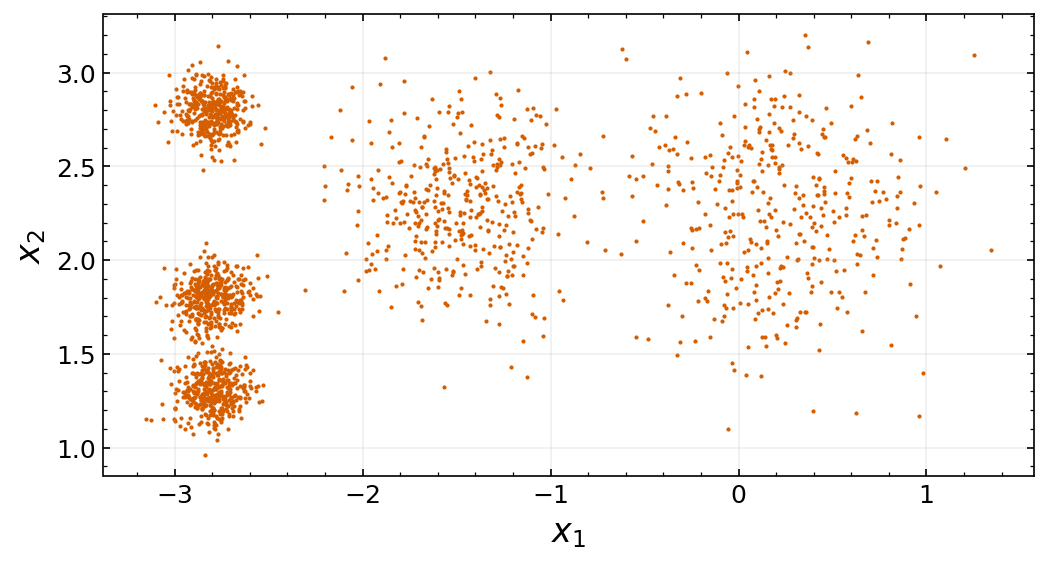

In [29]:
X, y= setup()
plt.figure(figsize=(8, 4),dpi = 150)
plot_clusters(X)
xticks = plt.xticks()
print(X)
plt.show()

We can refer to clusters by their **centroids**, which are defined as the arithmetic mean of the feature values of all points in the cluster; in other words, it is the mean point in a given cluster. 

We have created five new blobs of data. However, we need to make a model that can identify each blob. If we knew the centroids of each blob or the identity of each entry, this task would be easy. However, in unsupervised learning, we have neither of these.

The most common k-means algorithm works by iteratively generating clusters. 

* First, $k$ centroids are randomly selected and every sample in the dataset is classified based on its nearest centroid. 
<br>

* After all points are assigned to clusters, the centroid of each cluster is updated by taking the mean of all points in that cluster. 
<br>

* Points are then reclassified by their closest centroid before another update of the centroids is performed. 

This process continues iteratively until the assigned clusters no longer change, but this is not guaranteed to be the optimum clustering. This technique is simple yet effective. 

However, a downside of K-means is you must define **how many clusters to look for**.

A worked code example, with a more detailed explanation of the algorithm, is given in Appendix A: [K-Means Worked Code](#K-means_app).

Let's give it a try here:

In [8]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

c:\Users\Nick\miniconda3\envs\ML_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
print(y_pred[0:20])

[0 0 4 0 0 0 0 0 2 0 0 0 0 0 0 0 3 2 3 1]


In [10]:
kmeans.cluster_centers_ # to find the centres of the clusters

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

Let's look at how well it did:

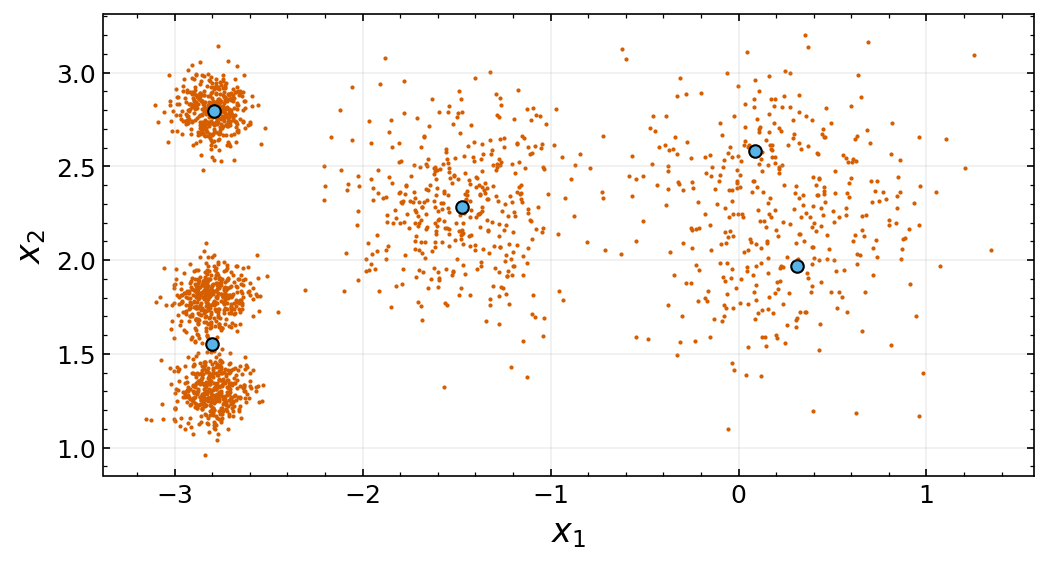

In [28]:
plt.figure(figsize=(8, 4),dpi = 150)
plot_clusters(X)
#print(X)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="#56B4E9",edgecolor='black')
#print(kmeans.inertia_)
plt.tick_params(which='both',labelsize = 12, direction='in',top=True,right=True)
plt.show() # pretty good


We can see our centroids are not bad, although the two clusters in the bottom left appear to have been identified as just one cluster. 

We can then use the model to predict the labels for new data:

In [30]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
#try adding some more data to see what happens

kmeans.predict(X_new)

array([4, 4, 3, 3])

We can plot the decision boundaries as a Voronoi plot (code taken straight from **{homl}**):

In [45]:
def plot_data(X):
    # Plotting data points from input X
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plt.tick_params(which='both',direction='in',top=True,right=True,labelsize =12)
    xticks = plt.xticks()[0]
    plt.gca().xaxis.set_minor_locator(MultipleLocator(np.diff(xticks)[0]/5))
    yticks = plt.yticks()[0]
    plt.gca().yaxis.set_minor_locator(MultipleLocator(np.diff(yticks)[0]/5))
      
    

def plot_centroids(centroids, weights=None, cross_color='red'):
     
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    
    plt.scatter(centroids[:, 0], centroids[:, 1],  # Plot centroids
                marker='x', s=8, linewidths=15,
                color=cross_color, zorder=11, alpha=1)
    

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1 
    maxs = X.max(axis=0) + 0.1
    
    # Generate grid of points in the defined limits
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),  
                         np.linspace(mins[1], maxs[1], resolution))
    
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])  # Perform clustering on the grid points
    Z = Z.reshape(xx.shape)  # Reshape results to have same shape as the grid

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  # Plot the filled contours (decision boundaries)
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  # Plot the contour lines
                linewidths=1, colors='k')
    
    plot_data(X)  # Plot the original data
    
    if show_centroids:
        # Plot the centroids if specified
        plot_centroids(clusterer.cluster_centers_)  

    if show_xlabels:
        # Show x-axis label if specified
        plt.xlabel("$x_1$", fontsize=14)  
    else:
        # Hide x-axis labels
        plt.tick_params(labelbottom=False)  
        
    if show_ylabels:
        # Show y-axis label if specified
        plt.ylabel("$x_2$", fontsize=14, rotation=0)  
    else:
        # Hide y-axis labels
        plt.tick_params(labelleft=False)  


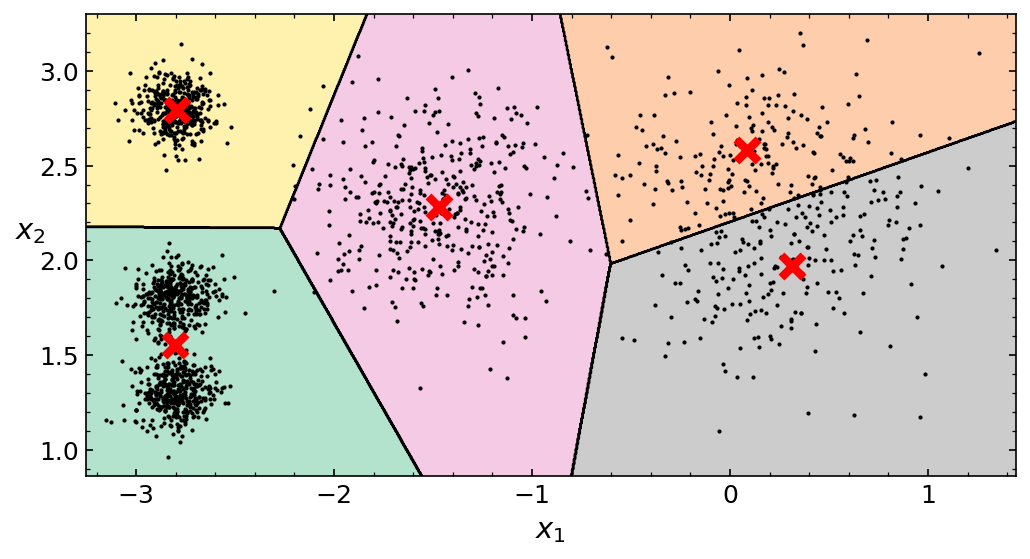

In [46]:
plt.figure(figsize=(8, 4),dpi = 150)
plot_decision_boundaries(kmeans, X)
plt.show()

If we happen to have a vague idea of where the centroids are, we can give the model starting positions for the clusters rather than initialising our centroids randomly. 

```python
init_guess=np.array([-3,1.0],[-3,2],[-3,3],[-1,2],[0,2])
kmeans=KMeans(n-cluster=5,init=init_guess,n_inits=5)
```

## Inertia

When the k-means algorithm is called, it actually runs several times. The number of times it runs is given by ```n_inits``` and the default value is 10. k-means then uses a performance algorithm to detemine which is the best run and keeps that one. The performance metric is called **inertia** and is defined as the mean squared distance between each centroid and the instances associated with it. 

`kmeans` can return this value if called:

In [12]:
kmeans.inertia_

219.42800073647595

<div style="background-color:#C2F5DD">

### Exercise
Plot what happens to the inertia score as you change the number of centroids in your algorithm. Can you use this to determine how many centroids you should have?

In [ ]:
# Your code here


<div style="background-color:#C2F5DD">

### Exercise: k-means with IRIS Datatset <a id='K-means_iris'></a>
    
Below is the code to use the k-means algorithm on the IRIS data (i.e. to separate the classes out without using labels). Even though we have only been using 2D to show plots, the algorithm will happily run in multiple dimensions.
    
Experiment with finding a method to measure the accuracy of this model. Note that the labels used by the IRIS dataset are not necessarily the same as the k-means cluster labelling.
    
Although the IRIS dataset only has three types of flower, try changing the number of clusters (and thus have multiple clusters for the same label). Does this improve accuracy?
    
_An example solution to this is given in Appendix B: [Exercise Solution: k-means with IRIS Dataset](#iris_ex_app)_

In [13]:
import numpy as np
import scipy as sp 
from sklearn.datasets import load_iris
iris=load_iris()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.2)


# Try changing this value
k = 3 #4


kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
y_pred = kmeans.fit_predict(X_train)

In [15]:
yp=kmeans.predict(X_test)

In [16]:
print(yp)
print()
print(y_test)
# As predicted, the labels are not aligned
# This must be resolved before the accuracy can be calculated

[0 1 1 2 0 1 1 2 2 1 0 1 1 1 0 1 0 1 1 2 1 2 0 2 0 0 1 1 0 0]

[1 0 0 2 1 0 0 2 2 0 1 0 0 0 1 0 1 0 0 2 0 2 1 2 1 1 0 0 1 1]


<hr style="border:2px solid gray">

# DBSCAN [^](#index) <a id='DBSCAN'></a>

**DBSCAN** stands for 'Density-Based Spatial Clustering of Applications with Noise'.

DBSCAN is a popular clustering algorithm used in machine learning and data mining. Unlike k-means, which requires specifying the number of clusters in advance, DBSCAN automatically determines the number of clusters based on the density of the data.

DBSCAN operates by grouping together data points that are close to each other and lie in a dense region, while separating regions of lower density. The algorithm identifies **core points** which have a sufficient number of neighboring points within a specified distance ($\epsilon$). It then expands clusters by including reachable points within this distance. Any points that are not part of a cluster are considered outliers or noise.

Practical usage: In high-energy physics experiments, particle tracks are reconstructed from the signals recorded by particle detectors. DBSCAN can then be applied to identify and group together the recorded signals that belong to the same particle track. By clustering these signals based on their spatial proximity, DBSCAN helps to accurately restore the paths of the particles.

A worked code example, with a more detailed explanation of DBSCAN, is given in Appendix C: [DBSCAN Worked Code](#DBSCAN_app)


<div style="background-color: #FFF8C6">

### Optional Example

We have a dataset of particles with two features: momentum and charge. The goal is to group these particles based on these two features. Note: this is not actual particle data, but data that has been randomly generated that we have applied the physical context of particle identification to. 

Here, we are simulating data from four types of particles, each with different distributions of momentum and charge:

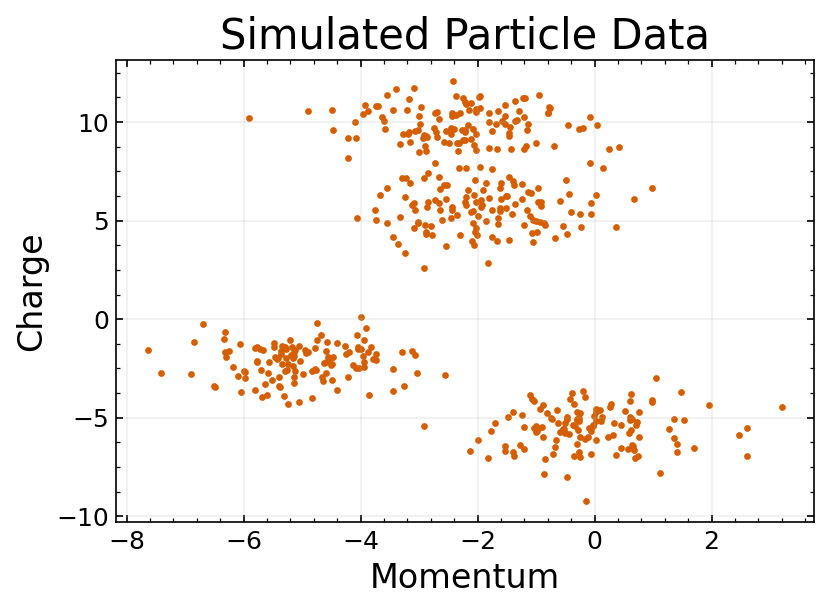

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(50)

# Make up data for 4 different particles
data, _ = make_blobs(n_samples=500, centers=4, cluster_std=1)

# The first feature is momentum, the second is charge
momentum = data[:, 0]
charge = data[:, 1]

fig = plt.figure(figsize = (6,4),dpi = 150)
plt.scatter(momentum, charge,color='#D55E00', s = 5)
plt.xlabel('Momentum',fontsize = 16)
plt.ylabel('Charge',fontsize = 16)
plt.title('Simulated Particle Data',fontsize = 20)
plt.tick_params(which='both',direction='in',top=True, right = True, labelsize = 12)
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.4))
plt.gca().yaxis.set_minor_locator(MultipleLocator(1.25))
plt.grid('xkcd:dark blue',alpha = 0.2)
plt.show()


<div style="background-color: #FFF8C6">

We can now use DBSCAN to identify the particle types.

DBSCAN takes two parameters: 
- ```eps``` : specifies the maximum distance between two samples for them to be considered as in the same neighborhood
- ```min_samples``` : the number of samples in the neighborhood of a point for it to be considered a core point. 
    
Try to alter these values in the code below to see how the plot changes.

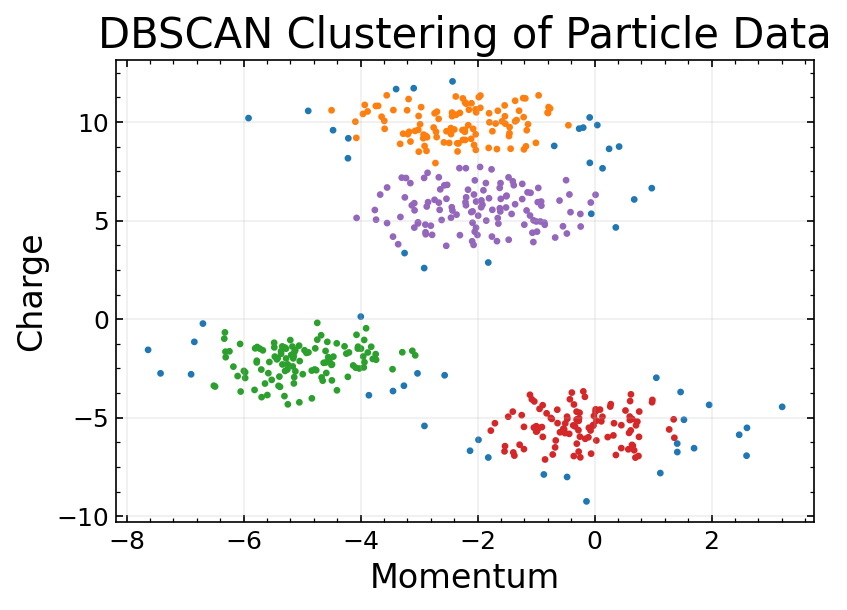

In [61]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN on data
dbscan = DBSCAN(eps=0.7, min_samples=10)
clusters = dbscan.fit_predict(data)
cmap = plt.colormaps['tab10']


# Plot the clustered data
# The colour of the points demonstrate how DBSCAN has separated the data

fig = plt.figure(figsize = (6,4),dpi = 150)
plt.scatter(momentum, charge, color=cmap(clusters+1), s = 5)
plt.xlabel('Momentum',fontsize = 16)
plt.ylabel('Charge',fontsize = 16)
plt.title('DBSCAN Clustering of Particle Data',fontsize = 20)
plt.tick_params(which='both',direction='in',top=True, right = True, labelsize = 12)
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.4))
plt.gca().yaxis.set_minor_locator(MultipleLocator(1.25))
plt.grid('xkcd:dark blue',alpha = 0.2)
plt.show()


<hr style="border:2px solid gray">
<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

# Appendices <a id='appendix'></a>

[Return to Index](#index)

In this section, you will find longer pieces of mathematics and code which are **non-examinable**. Please read at your own discretion

- A. [k-means Worked Code](#K-means_app)
- B. [Exercise Solution: k-means with IRIS Dataset](#iris_ex_app)
- C. [DBSCAN Worked Code](#DBSCAN_app)

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## A. k-means Worked Code [^^](#appendix) <a id='K-Means_app'></a>

[Return to relevant section in notes](#KM_explain) 
        
In this section, we will manually implement a k-means clustering algorithm (as opposed to using `sklearn`).
    
Firstly, we randomly select $k$ data points to be our predicted clump centres:

In [63]:
def setup():
    blob_centers = np.array(
        [[ 0.2,  2.3],
         [-1.5 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8],
         [-2.8,  1.3]])
    blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
    return (X, y)

In [64]:
def initial_centroids(X, k=5, plot = False, set_rand=False):
    
    if set_rand:
        np.random.seed(9001)
        
    length=len(X)

    centroids_index=np.random.randint(0, high=length, size = k)
    centroids=np.array([np.array(X[i]) for i in centroids_index])
    
    if plot:
        plot_clusters(X)

        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=10, linewidths=10, 
                    color='black', zorder=20, alpha=1)
        plt.show()
        
    return (centroids)

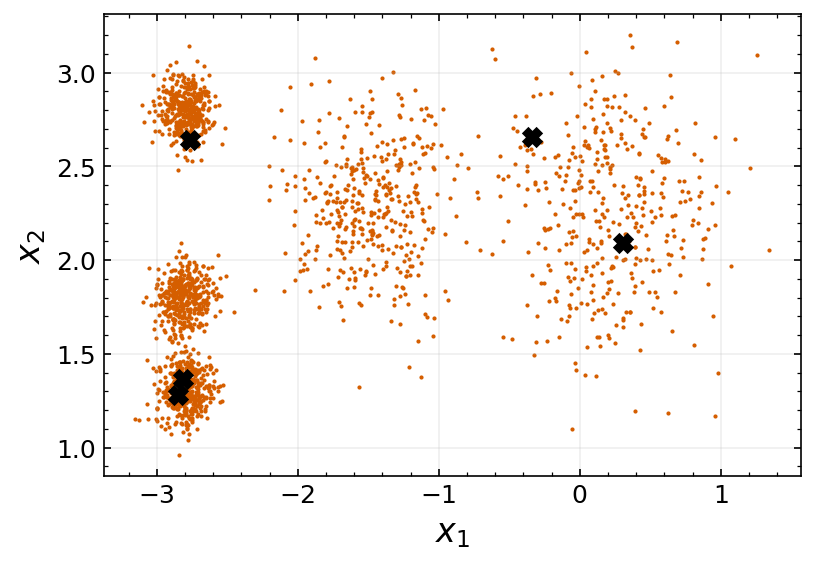

In [65]:
X, _ = setup()
plt.figure(figsize=(6,4),dpi = 150)
centroids = initial_centroids(X, k=5, plot = True, set_rand = True)

<div style="background-color:#efdff2">
    
We now group each point based on which centroid they are closest to (using the Euclidian distance). We can also choose to sum these distances to find the **inertia** (see below for its use).

In [66]:
def closest_centroid(X, centroids, contour=False):
    
    contour_arr=[]
    cluster_list=[]
    inertia=0
    
    for i in range(len(centroids)):
        cluster_list.append([])

    for point in X:
        min_dist_sq=np.inf
        min_centroid_num=0

        for num, centre in enumerate(centroids):           
            dist_sq = (centre[0]-point[0])**2 + (centre[1]-point[1])**2
            
            if dist_sq< min_dist_sq:
                min_dist_sq = dist_sq
                min_centroid_num = num

        cluster_list[min_centroid_num].append(point)
        inertia += np.sqrt(min_dist_sq)
            
            
        if contour:
            contour_arr.append(min_centroid_num)
    
    cluster_arr=np.array([np.array(l) for l in cluster_list], dtype=object)
    if contour:        
        return np.array(contour_arr, dtype=object)

    else:
        return np.array(cluster_arr, dtype=object), inertia


In [67]:
def plot_model(centroids, cluster_arr,  ax = 0, resolution = 500, colors= 'tab10'):
    
    if not ax:
        ax= plt.subplot(111)
    
    cmap = plt.colormaps[colors]
            
    mins = X.min(axis=0) - 0.1 
    maxs = X.max(axis=0) + 0.1
    
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),  
                         np.linspace(mins[1], maxs[1], resolution))

    
    Z = closest_centroid(np.c_[xx.ravel(), yy.ravel()], centroids, contour=True)
    Z = np.array(Z, dtype=int).reshape(xx.shape) 
    
    ax.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap = cmap, alpha=0.3) 
    ax.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

    for num, arr in enumerate(cluster_arr):
        ax.scatter(arr[:,0], arr[:,1], s=1, color= cmap(num))
        
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=10, linewidths=10, 
                color='black', zorder=20, alpha=1)


Inertia:  894.5178494861835


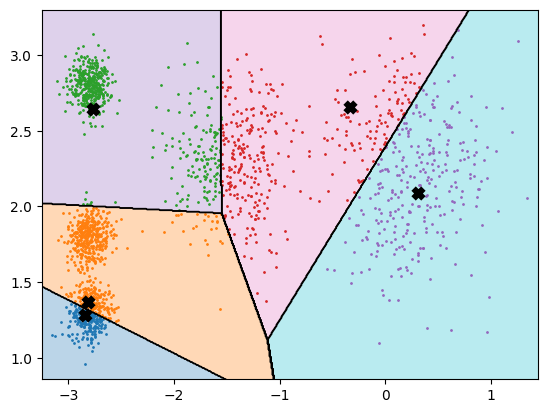

In [68]:
cluster_arr, inertia  = closest_centroid(X, centroids)
print ('Inertia: ', inertia)
plot_model(centroids, cluster_arr)

<div style="background-color:#efdff2">

The contour plot displays how our model is currently dividing the data. We can see that the contour line divisions do not match our clumps.

To improve our model we must have an improved guess of the centroids position. We find this by finding the average position over all the points in each grouping. Note the decrease in inertia - this suggests points are now closer to their relevant centroid and hence the model is a better fit.

In [69]:
def find_centroids(cluster_arr):
    new_centroids = []
    for arr in cluster_arr:
        x_avg = np.average(arr[:, 0])
        y_avg = np.average(arr[:, 1])
        new_centroids.append(np.array([x_avg, y_avg]))
     
    return np.array(new_centroids)

Inertia:  694.0932723993552


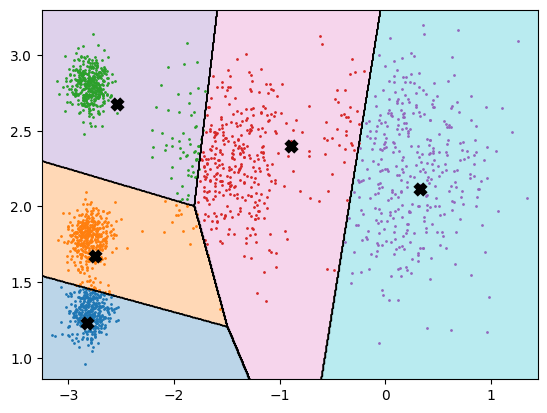

In [70]:
centroids = find_centroids(cluster_arr)
cluster_arr, inertia  = closest_centroid(X, centroids)

print ('Inertia: ', inertia)
plot_model(centroids, cluster_arr)

<div style="background-color:#efdff2">

We repeat this process of calculating centroids and reclassifying the points until one of the stopping conditions is met:
- The centroid positions do not change between iterations
- The maximum number of iterations are reached
    
We can combine our code so far to see a complete k-means algorithm.

In [71]:
def kmeans_one(X, k=5, max_iter=45, plot_cont=False):
    
    centroids = initial_centroids(X, k=5, plot = False)
    
    if plot_cont:
        plt.figure(figsize=(15, 12))
    
    for i in range(max_iter):

        prev = centroids[:]
        cluster_arr, inertia=closest_centroid(X, centroids)
        
        if plot_cont:
            if i % 5 == 0:
                ax = plt.subplot(3, 3, (i // 5 + 1))
                
                ax.set_title(str(i+1) + " Iteration(s)", fontsize=16)
                plot_model(centroids, cluster_arr, ax=ax)
                               
        centroids = find_centroids(cluster_arr)
                   
        if np.array_equal(prev,centroids):
            plt.show()
            if plot_cont:
                print ('Centroids are consistant after', i,'iterations')
            break 
    
    return centroids, cluster_arr, inertia
          

We will run this for a maximum of 45 iterations:

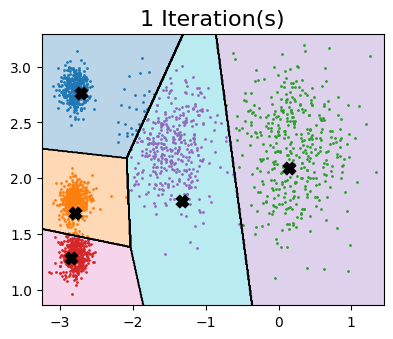

Centroids are consistant after 3 iterations


In [72]:
X, _ = setup()

centroids, cluster_arr, inertia = kmeans_one(X, k=5, max_iter=45, plot_cont=True)

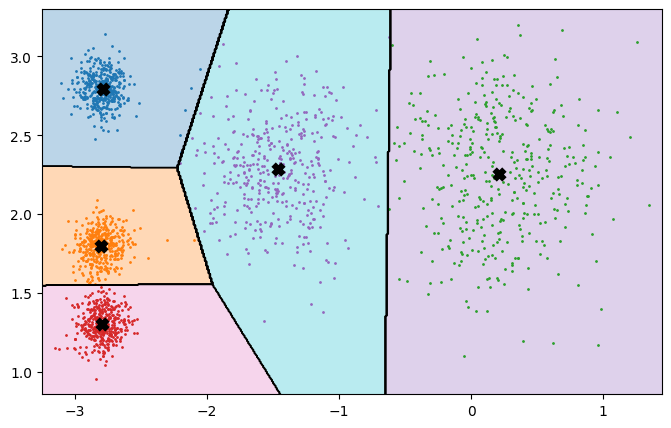

Inertia:  493.74457285479315


In [101]:
plt.figure(figsize=(8, 5))
plot_model(centroids, cluster_arr)
plt.show()

print ('Inertia: ', inertia)

<div style="background-color:#efdff2">

Try running the cell above a few more times. As you can (probably) see from the output, the algorithm is heavily dependent on the random starting positions of the centroids. This is why we repeat the process a number of times with different random starting values, and choose the run which minimises the inertia. 

In [73]:
def k_means(k=5, runs=9, max_iter=50):
    X, _ = setup()
    min_inertia = np.inf
    centre_list=[]
    cluster_list=[]
    
    for i in range(runs):
        
        centres, cluster_arr, inertia = kmeans_one(X, k=k, max_iter=max_iter, plot_cont=False)
        
        centre_list.append(centres)
        cluster_list.append(cluster_arr)
        
        if inertia <  min_inertia:
            min_inertia = inertia
            min_centres = centres
            min_cluster = cluster_arr
            num =i+1
        
    plt.figure(figsize=(15, 12))
    count=1
    for centres, cluster_arr in zip (centre_list, cluster_list):
        ax = plt.subplot(3, 3, (count))
        ax.set_title(str(count) + " run(s)", fontsize=16)
        plot_model(centres, cluster_arr, ax=ax)
        count+=1
             
    plt.show()
    
    
    plt.figure(figsize=(10, 7))
    
    print ('Final Plot with Minimum Inertia, run no.',num)        
    plot_model(min_centres, min_cluster)
    plt.show()
    
    return min_centres, min_inertia
 

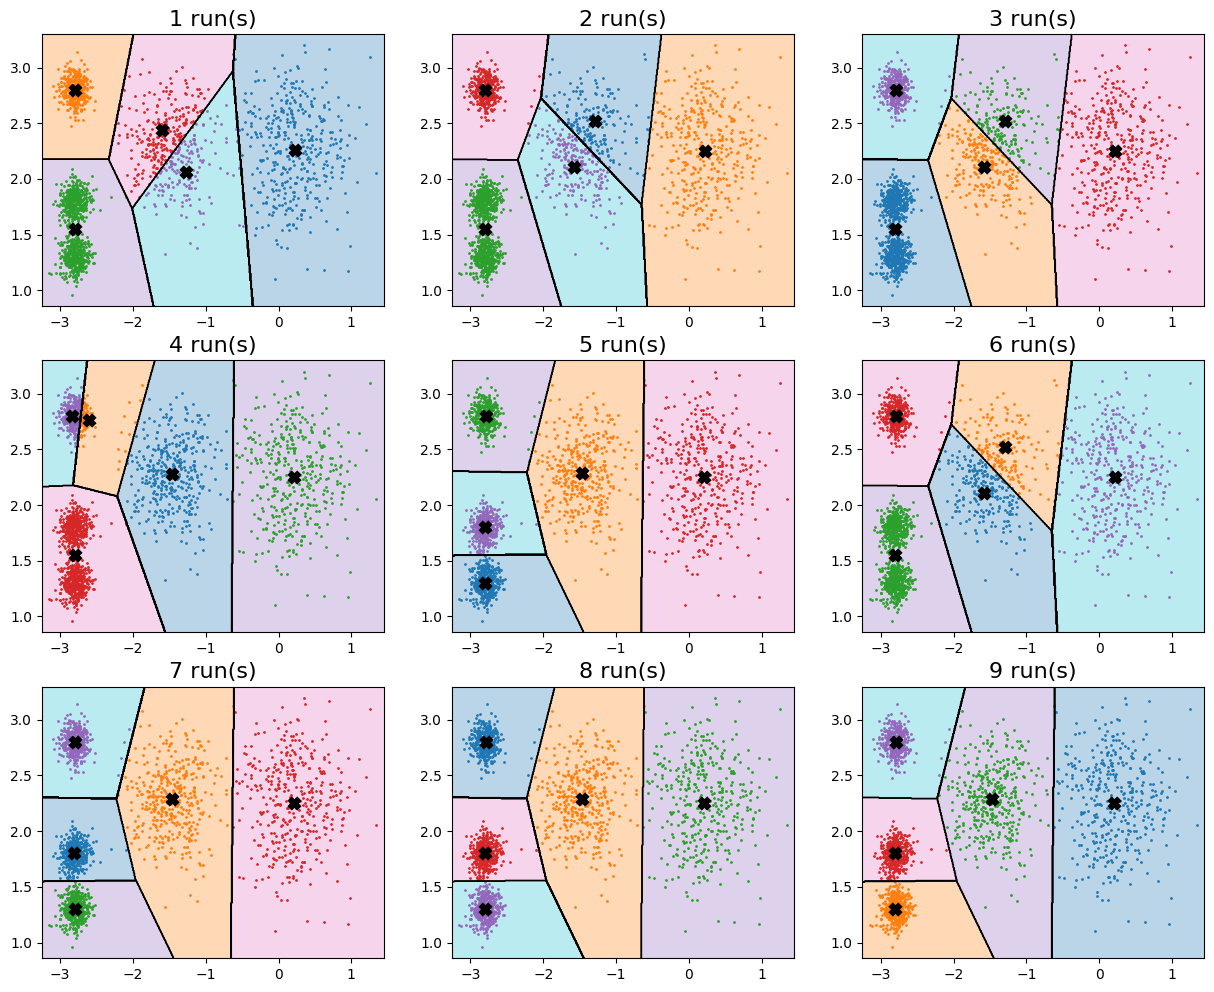

Final Plot with Minimum Inertia, run no. 5


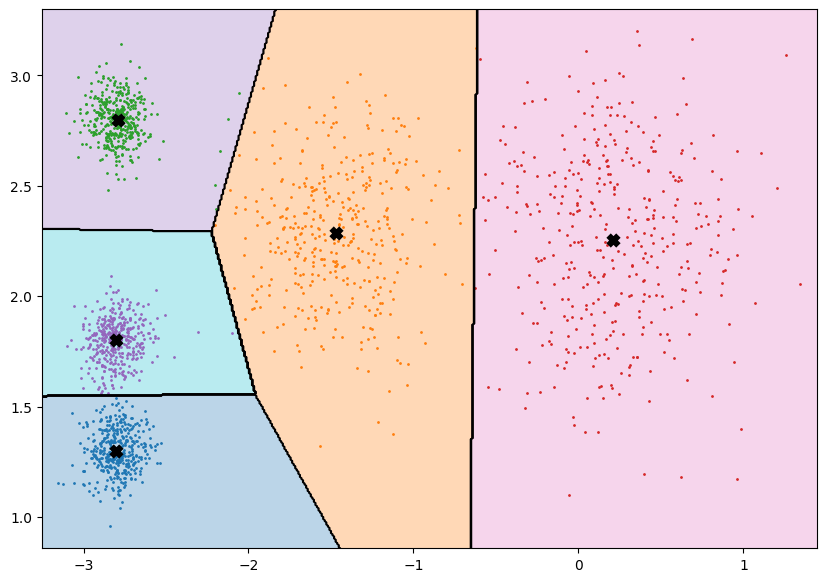

In [74]:
min_centres, min_inertia = k_means()

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## B. Exercise Solution: k-means with IRIS Dataset [^^](#appendix) <a id='iris_ex_app'></a>

[Return to relevant section in notes](#K-means_iris) 
    
Below is an example of a function which aligns the labels of the IRIS dataset to the cluster labels of the k-means model, including if the number of clusters and flower types differ. This is far from the only solution.

In [104]:
def convert_pred(pred_array, length=50):

    y_pred_check = y_pred[:length]
    y_train_check = y_train[:length]

    count_mat=np.zeros((k,3))

    for i, j in zip(y_pred_check, y_train_check):

        count_mat[i,j]+=1 
        #i, the row, is the class given by the predictor
        #j, the column, is the class given by the labels

    conv=[]
    for row in count_mat:
        conv.append(np.argmax(row))

    convert_arr =[]
    for i in pred_array:
        convert_arr.append(conv[i])
        
    return (np.array(convert_arr))

In [105]:
print(convert_pred(yp))      
print()
print(y_test)

[1 0 0 2 1 0 0 2 2 0 1 0 0 0 1 0 1 0 0 2 0 2 1 2 1 1 0 0 1 1]

[1 0 0 2 1 0 0 2 2 0 1 0 0 0 1 0 1 0 0 2 0 2 1 2 1 1 0 0 1 1]


<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## C. DBSCAN Worked Code [^^](#appendix) <a id='DBSCAN_app'></a>

[Return to relevant section in notes](#DBSCAN) 
    
In this section, we will manually implement a version of DBSCAN for clustering. 
    
Once again, we will start by setting up the problem. DBSCAN will have to iterate over all the points, so we may wish to reduce the number of samples.
    
All points are initially unclssified, so we can also create a zeros array to store this information. Although not strictly necessary, we will also define a 'neighbourhood matrix' in this section to increase the algorithm's efficiency (more below).

In [75]:
def setup(n_samples=2000):
    blob_centers = np.array(
        [[ 0.2,  2.3],
         [-1.5 ,  2.3],
         [-2.8,  2.0],
         [-2.8,  2.8],
         [-2.8,  1.3]])
    blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
    X, y = make_blobs(n_samples=n_samples, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
    return (X, y)

In [76]:
def DBSCAN_start(data):
    
    global cluster_arr
    
    length = len(data)
    cluster_arr = np.zeros(length)
    count=1
    
    neighbour_mat = np.zeros((length, length))
    
    return length, cluster_arr, neighbour_mat

<div style="background-color:#efdff2">
    
We will now define some key terms we will need in order to understand DBSCAN.
    
The **neighbourhood** of points for some given point, $p$, contains all points that are less than a given Euclidian distance from $p$ (including $p$ itself). This distance is of great importance to DBSCAN and is given the notation $\boldsymbol{\epsilon}$. 
    
Below, we define a function to check whether a point $q$ is in the neighbourhood of $p$. We will store our results in `neighbour_mat` so that we do not repeat any calculations. The position within the array will represent the indices of the two points being checked.

In [77]:
def neighbour_check(p_index, q_index, data, eps, neighbour_mat):

    p, q = data[p_index], data[q_index]
    mat_index = np.sort([p_index, q_index]) # This ensures that the coords are always entered the same way
    checked = neighbour_mat[mat_index[0], mat_index[1]]
    
    if checked == 0:    
        total=0

        for a,b in zip(p, q):
            total += (a-b)**2

        distance = np.sqrt(total)

        if distance <= eps:
            neighbour_mat[mat_index[0], mat_index[1]] = 1 
            neighbour = True

        else:
            neighbour_mat[mat_index[0], mat_index[1]] = -1
            neighbour = False
        
    elif checked == 1:
        neighbour = True
    else:
        neighbour = False
        
    return neighbour, neighbour_mat

<div style="background-color:#efdff2">

Another important parameter for DBSCAN is `min_points` (or `min_samples`). This is the minimum number of points in the neighbourhood of $p$ required to designate $p$ as a **core point**.

A core point and its neighbourhood will be grouped in the same cluster. 

If a point $q$ is not a core point, but is in the neighbourhood of a core point, it is called as a **border point**.

If a point is neither a core point or a border point, it is called as a **noise point**. These points do not belong in any cluster.
    
We will define a function to check whether a point is a core point. We will also record the index of any point in the neighbourhood.

In [78]:
def core_point(p_index, data, eps, min_points, neighbour_mat, length):
    
    neighbour_list = []
    
    for q_index in range(length):
        
        neighbour, neighbour_mat = neighbour_check(p_index, q_index, data, eps, neighbour_mat)
        
        if neighbour:
            neighbour_list.append(q_index)
            
    if len(neighbour_list) >= min_points:
        core = True
    else: core = False
        
    return core, neighbour_list, neighbour_mat

<div style="background-color:#efdff2">

The core point and its neighbour should be classified as belonging to the same cluster. We also want this process to continue recursively. This means that we want to repeat the entire process for every point in the neighbourhood, and then for every point in that neighbourhood, and so on.
    
We describe points connected by these successive neighbourhoods as being **density connected**, with all density connected points belonging to the same cluster.

In [79]:
def mark_cluster(p_index, data, cluster_arr, cluster_no, eps, min_points, neighbour_mat, length):  
    
    core, neighbour_list, neighbour_mat = core_point(p_index, data, eps, min_points, neighbour_mat, length)
    
    if core:
        
        for i in neighbour_list:
            
            if cluster_arr[i]: continue # If point already classified, we do not need to repeat the process
                
            cluster_arr[i] = cluster_no 
            mark_cluster(i, data, cluster_arr, cluster_no, eps, min_points, neighbour_mat, length)  
            # The process continues recursively
            
    return cluster_arr, neighbour_mat
    

<div style="background-color:#efdff2">

Finally, we will combine all our functions to create a DBSCAN algorithm. Each time we reach an unclassified point in data, we will change the cluster number and perform `mark_cluster`.

In [80]:
from copy import deepcopy

def DBSCAN(data, eps, min_points):
    
    length, cluster_arr, neighbour_mat = DBSCAN_start(data)
    
    cluster_no = 1
    
    for i in range(length):
        
        if cluster_arr[i]: continue 
            
        cluster_arr_copy = deepcopy(cluster_arr)
        
        cluster_arr, neighbour_mat =  mark_cluster(i, data, cluster_arr, cluster_no, eps, min_points, neighbour_mat, length)
        
        if not np.array_equal(cluster_arr,cluster_arr_copy):
            # If there has been a change to cluster_arr, we want to change the cluster_no
            cluster_no += 1
            
    return np.array(cluster_arr, dtype =int)
        
    

<div style="background-color:#efdff2">
    
Before we run our algorithm on our cluster data, we will run on a smaller set and visualise how DBSCAN behaves.

In [81]:
def plot_circle(point, radius, color, zorder=0):
    
    no_points=50

    angles = np.linspace(0, 2 * np.pi, no_points+1)

    x_coord = radius * np.cos(angles) + point[0]
    y_coord = radius * np.sin(angles) + point[1]
    
    plt.plot(x_coord, y_coord, c=color, zorder=zorder)

In [82]:
def plot_neighbour(p_index, data, eps, min_points, depth = 0, neighbour_mat=[], cluster_arr=[]):
    
    length = len(data)
    
    if len(neighbour_mat) == 0:
        neighbour_mat = np.zeros((length, length))
        cluster_arr = np.zeros(length)       
    
    p = data[p_index]
    
    plt.scatter(data[:, 0], data[:, 1], s=10, zorder=0)
             
    core, neighbour_list, neighbour_mat = core_point(p_index, data, eps, min_points, neighbour_mat, length)
             
    if core: #Core points in a cluster are shown in blue
        c = 'blue'
        points = np.array([data[i] for i in neighbour_list])
        plt.scatter(points[:, 0], points[:, 1], color = c , marker='x', s=50)
        
    else: # Non-core points are shown in black
        c = 'black'
        depth = 0
    
    plt.scatter(p[0], p[1], color = c, marker='x', s=50)
    plot_circle(p, eps, c)
    
    if depth != 0:
        for q_index in neighbour_list:
            q = data[q_index]
            classified = cluster_arr[q_index]
            
            if classified: continue # So we don't repeat our plots
            cluster_arr[q_index] = 1 
            plot_neighbour(q_index, data, eps, min_points, depth = depth-1, neighbour_mat = neighbour_mat, cluster_arr= cluster_arr)
            

        

<div style="background-color:#efdff2">
    
In the code below, we simulate the start of the DBSCAN on some random data. We begin with a random point, and identify both its neighbourhood and whether it is a core point. This process repeats up to a maximum 'depth', rather than until the cluster is complete.
    
Experiment with the code, changing depth, eps and min_points to see how it effects the chosen cluster.

In [83]:
index = 0
data = np.random.rand(300,2) * 3

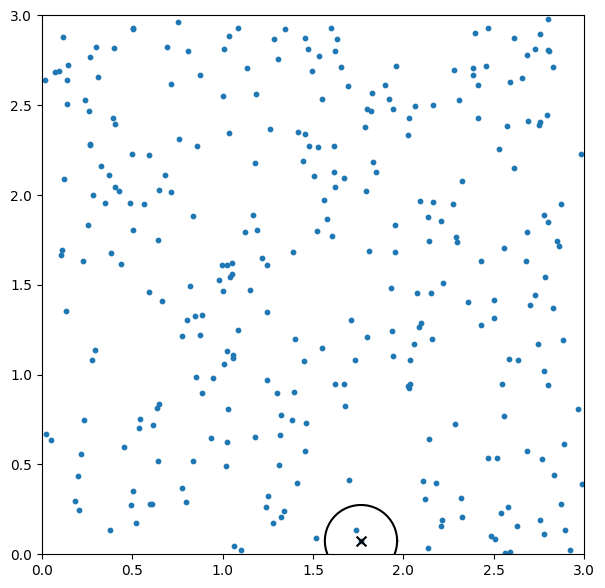

In [85]:
plt.figure(figsize=(7, 7))
plt.axis([0,3,0,3])
plot_neighbour(index, data, eps=0.2, min_points = 4, depth = 2) # Try changing parameters here

plt.show()

<div style="background-color:#efdff2">

Now we will run our program for the cluster data.

In [88]:
X, _ = setup(n_samples=500)

In [89]:
cluster_arr = DBSCAN(X, 0.18, 3)

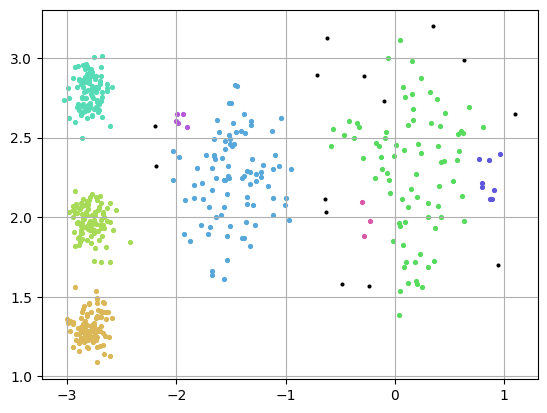

In [90]:
num_color = np.max(cluster_arr)
color_arr = sns.color_palette("hls", num_color+1)
for point, cluster in zip(X, cluster_arr):
    if not cluster:
        plt.scatter(point[0], point[1], s=15, color = 'black', marker='.', zorder=0)
    else:
        plt.scatter(point[0], point[1], s=30, color = color_arr[cluster], marker='.', zorder=1)
plt.grid()
plt.show()